<a href="https://colab.research.google.com/github/shahchayan9/Timegpt-Tabula9-and-Relational-Deep-Learning/blob/main/synthetic_data_for_a_real_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Scikit-Learn if not already installed
!pip install -U scikit-learn

In [ ]:
# Step 2: Import Required Libraries and Load Your Dataset
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (replace 'sample_data.csv' with the path to your dataset)
data = pd.read_csv('Insurance_compressed.csv')
print("Original Data Sample:")
print(data.head())

Original Data Sample:
   age  sex     bi  children  sm  region     charges
0   18    0  53.13         0   0       0   1163.4627
1   22    0  52.58         1   1       0  44501.3982
2   23    0  50.38         1   0       0   2438.0552
3   58    0  49.06         0   0       0  11381.3254
4   46    1  48.07         2   0       3   9432.9253


In [ ]:
# Step 3: Generate Synthetic Data
# Here we create synthetic data with a similar number of samples and features
n_samples = len(data)
n_features = len(data.columns) - 1  # Exclude the target column (e.g., 'charges')

In [ ]:
# Generate synthetic features and a target column similar to the 'charges' column
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1)
synthetic_data = pd.DataFrame(X, columns=data.columns[:-1])  # Using all columns except 'charges'
synthetic_data['charges'] = y  # Assign synthetic target variable to the 'charges' column

In [ ]:
print("\nSynthetic Data Sample:")
print(synthetic_data.head())


Synthetic Data Sample:
        age       sex        bi  children        sm    region     charges
0  0.393481 -1.422771 -0.734718  0.205173 -1.390285 -0.186791 -159.181428
1 -1.363765  0.194112 -2.045399 -0.314059  1.251941  0.744302 -108.173123
2  0.090593 -0.258201 -0.509088  1.218664 -0.438263 -0.078649   47.476592
3 -0.226645 -0.727594 -1.093442  0.012472  0.064649 -0.748713 -142.621065
4  0.767724 -0.125110  1.018257  1.172235 -1.210505  1.369289  184.092641


In [ ]:
# Step 4: Save Synthetic Data to CSV (optional)
synthetic_data.to_csv('synthetic_data.csv', index=False)

In [ ]:
# Step 5: Visualize and Compare Distributions
# Replace 'charges' with the target column you want to compare
column_name = 'charges'  # Column to compare

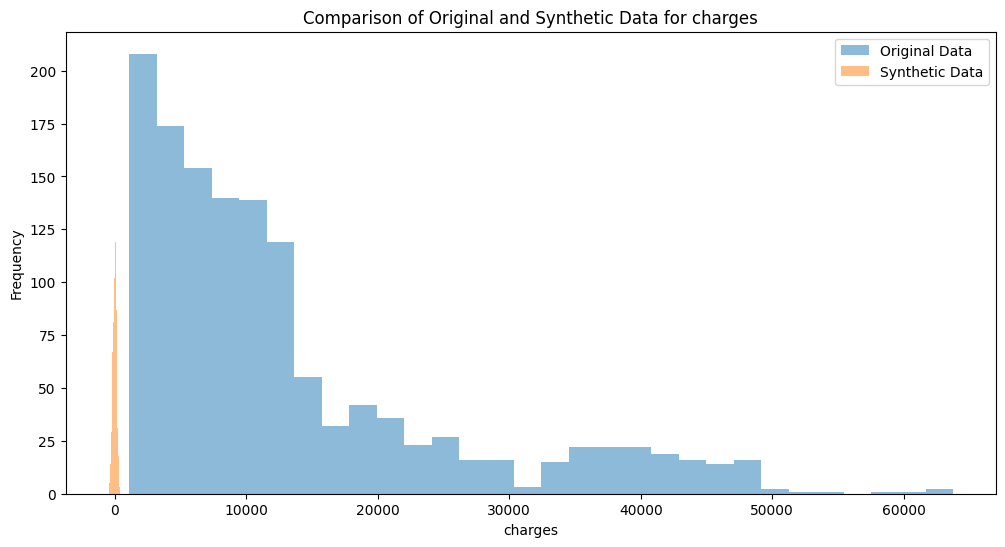

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data[column_name], bins=30, alpha=0.5, label='Original Data')
plt.hist(synthetic_data[column_name], bins=30, alpha=0.5, label='Synthetic Data')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.legend()
plt.title(f'Comparison of Original and Synthetic Data for {column_name}')
plt.show()